<a href="https://colab.research.google.com/github/CorentinMAG/AI/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On va utiliser un jeu de données appelé MNIST.  
Il est constitué d'un ensemble de 70 000 images de chiffre en 28x28 pixels en noir et blanc annotées du chiffre correspondant (entre 0 et 9).  
L'objectif de ce jeu de données était de permettre à un ordinateur d'apprendre à reconnaître des nombres manuscrits automatiquement (pour lire des chèques par exemple).  
Notre objectif sera donc d'entraîner un modèle qui sera capable de reconnaître les chiffres écrits sur ce type d'images

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [37]:
#les images 
#data contient les images sous forme de tableau, avec des pixels allant de 0 à 16
print(mnist.data.shape) 
#les annotations
print(mnist.target.shape)

(70000, 784)
(70000,)


70 000 est trop de données pour KNN.  
On va travailler sur un échantillon de 5000 données.

In [38]:
from sklearn.utils import resample

sample = np.random.randint(70000,size=5000) 
data = mnist.data[sample]
target = mnist.target[sample]

In [39]:
#on sépare le dataset en dataset d'entrainement et de test
from sklearn.model_selection import train_test_split

#x pour les images et y pour les annotations
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [40]:
from sklearn import neighbors

#on test avec les 3 plus proches voisins
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [41]:
#on test l'erreur de notre algorithme. Il renvoie le pourcentage de prédiction véridique
error = 1 - knn.score(xtest, ytest)

#ou bien
from sklearn.metrics import accuracy_score
knn.fit(xtrain, ytrain)
Z = clf.predict(xtest)
print('Erreur: %f' % error)
print(accuracy_score(Z,ytest))

Erreur: 0.063000
0.912


Maintenant on va chercher à optimiser k afin de minimiser l'erreur sur les données de test

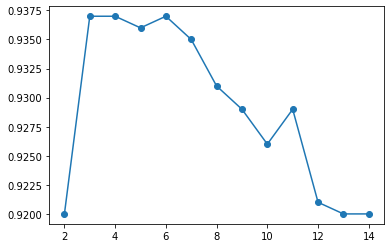

In [42]:
from sklearn.metrics import accuracy_score
result = []
n_values = range(2,15)
for n in n_values:
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(xtrain, ytrain)
    Z = clf.predict(xtest)
    score = accuracy_score(Z, ytest)
    result.append(score)
plt.plot(list(n_values), result, 'o-')

On voit que le k le plus performant est pour k = 4  
Ce qui veut dire que c'est celui qui classifie le mieux les données, et qui donc dans ce cas précis reconnaît au mieux les nombres écrits à la main.  


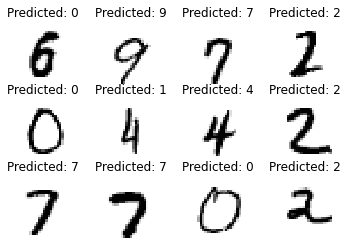

In [43]:
#quelques prédictions...
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(3)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

On peut également afficher les prédictions erronées

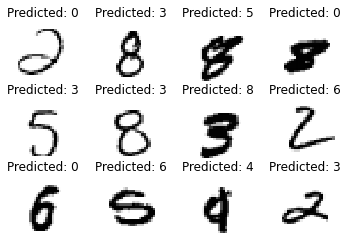

In [44]:
# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()